# Import train set

In [1]:
import pandas as pd


data_train = pd.read_csv('train.csv')

In [2]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# find the number of columns

In [4]:
print(f'Number of Columns-Attributes: {len([column for column in data_train.columns])}')

Number of Columns-Attributes: 12


# Check the info of the train dataset

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Drop unuseful columns

In [7]:
data_train = data_train.drop([
    'PassengerId', 'Name', 'Cabin', 'SibSp', 'Parch'
], axis=1)

In [10]:
data_train

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


# check for null-nan values

In [12]:
data_train.isnull().mean() * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
Fare         0.000000
Embarked     0.224467
dtype: float64

In [13]:
data_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

# check data type for column age

In [16]:
print(f'Data type for Age Column: {data_train['Age'].dtype}')

Data type for Age Column: float64


# replace nan with median value

In [20]:
age_median = data_train['Age'].median()
age_median

np.float64(28.0)

In [21]:
data_train['Age'].fillna(
    value=age_median, inplace=True
)

In [22]:
data_train['Age'].isnull().mean() * 100

np.float64(0.0)

# Convert Age column from float to int

In [23]:
import numpy as np

data_train['Age'] = data_train['Age'].astype(np.uint64)

In [24]:
data_train['Age'].dtype

dtype('uint64')

In [25]:
data_train['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    28
889    26
890    32
Name: Age, Length: 891, dtype: uint64

# Display Mean Age

In [27]:
mean_age = data_train['Age'].mean()

print(f'Mean Age: {int(mean_age)}')

Mean Age: 29


In [28]:
data_train

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22,7.2500,S
1,1,1,female,38,71.2833,C
2,1,3,female,26,7.9250,S
3,1,1,female,35,53.1000,S
4,0,3,male,35,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27,13.0000,S
887,1,1,female,19,30.0000,S
888,0,3,female,28,23.4500,S
889,1,1,male,26,30.0000,C


In [29]:
data_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# EDA

Create a histogram for 'Age'

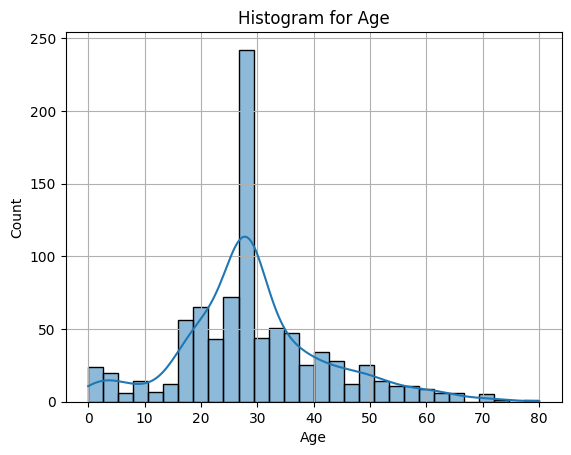

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data_train, x='Age', kde=True)
plt.title('Histogram for Age')
plt.grid()

Countplot for 'Sex' , comparing who survived

<Axes: xlabel='Sex', ylabel='count'>

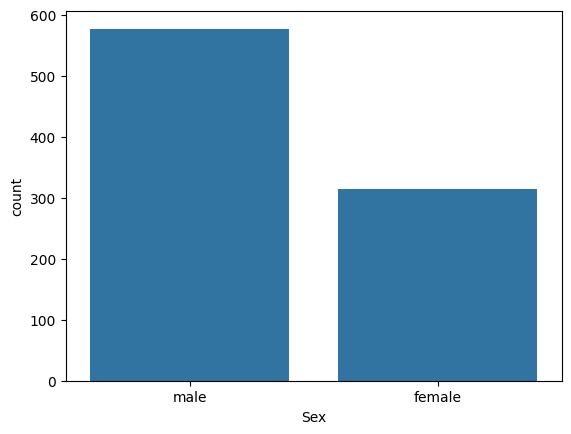

In [41]:
sns.countplot(data=data_train, x='Sex')

<Axes: xlabel='Sex', ylabel='count'>

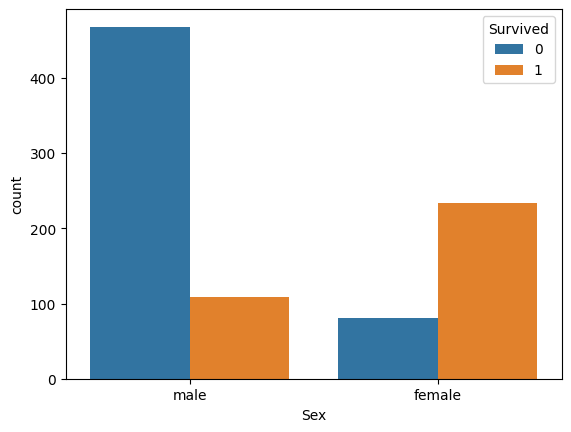

In [42]:
sns.countplot(data=data_train, x='Sex', hue='Survived')

Countplot for 'Pclass' with hue='Survived'

<Axes: xlabel='Pclass', ylabel='count'>

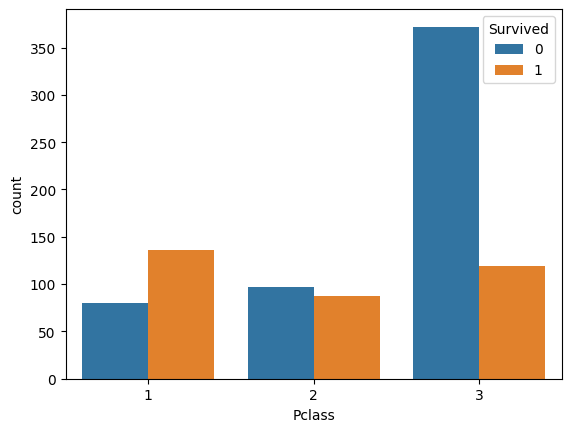

In [43]:
sns.countplot(data=data_train, x='Pclass', hue='Survived')

<Axes: xlabel='Age'>

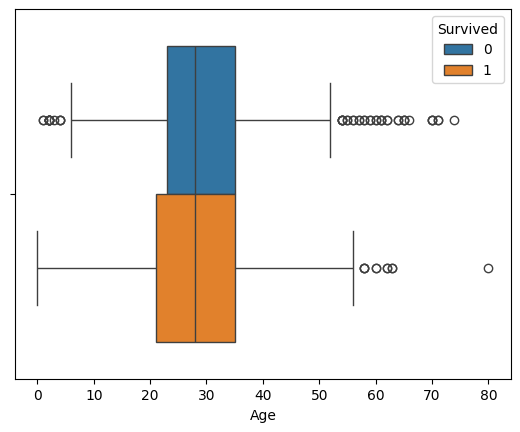

In [44]:
sns.boxplot(data=data_train, x='Age', hue='Survived')

Boxplot for 'Fare'

<Axes: xlabel='Fare'>

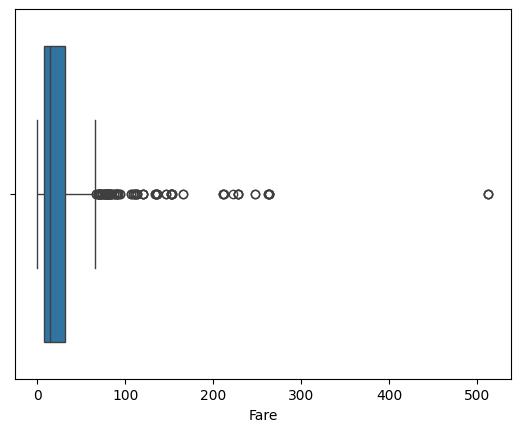

In [45]:
sns.boxplot(data=data_train, x='Fare')

Countplot for 'Embarked'

<Axes: xlabel='Embarked', ylabel='count'>

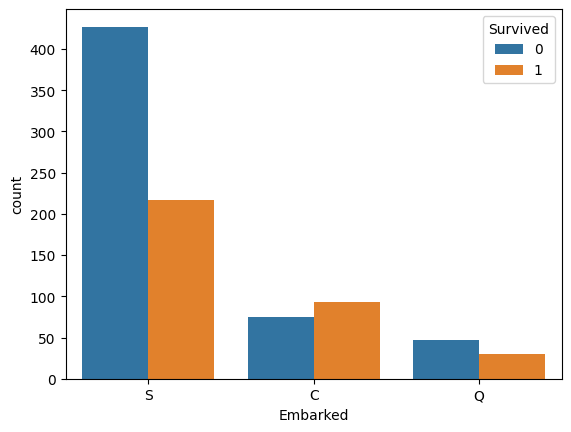

In [47]:
sns.countplot(data=data_train, x='Embarked', hue='Survived')

# Heatmap with corr matrix

<Axes: >

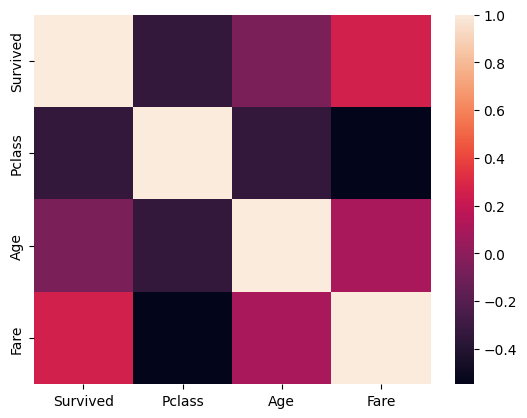

In [49]:
corr = data_train.corr(numeric_only=True)

sns.heatmap(data=corr)

In [50]:
data_train

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22,7.2500,S
1,1,1,female,38,71.2833,C
2,1,3,female,26,7.9250,S
3,1,1,female,35,53.1000,S
4,0,3,male,35,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27,13.0000,S
887,1,1,female,19,30.0000,S
888,0,3,female,28,23.4500,S
889,1,1,male,26,30.0000,C


# Convert 'Sex' and 'Embarked' columns to numerical

In [51]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

data_train['Sex_labeled'] = le.fit_transform(data_train['Sex'])
data_train['Embarked_labeled'] = le.fit_transform(data_train['Embarked'])

In [53]:
data_train['Sex_labeled'].value_counts()

Sex_labeled
1    577
0    314
Name: count, dtype: int64

In [54]:
data_train['Embarked_labeled'].value_counts()

Embarked_labeled
2    644
0    168
1     77
3      2
Name: count, dtype: int64

In [55]:
data_train

,Survived,Pclass,Sex,Age,Fare,Embarked,Sex_labeled,Embarked_labeled
0,0,3,male,22,7.2500,S,1,2
1,1,1,female,38,71.2833,C,0,0
2,1,3,female,26,7.9250,S,0,2
3,1,1,female,35,53.1000,S,0,2
4,0,3,male,35,8.0500,S,1,2
...,...,...,...,...,...,...,...,...
886,0,2,male,27,13.0000,S,1,2
887,1,1,female,19,30.0000,S,0,2
888,0,3,female,28,23.4500,S,0,2
889,1,1,male,26,30.0000,C,1,0


# Drop the unlabeled columns

In [56]:
data_train = data_train.drop([
    'Sex', 'Embarked'
], axis=1)

In [57]:
data_train

,Survived,Pclass,Age,Fare,Sex_labeled,Embarked_labeled
0,0,3,22,7.2500,1,2
1,1,1,38,71.2833,0,0
2,1,3,26,7.9250,0,2
3,1,1,35,53.1000,0,2
4,0,3,35,8.0500,1,2
...,...,...,...,...,...,...
886,0,2,27,13.0000,1,2
887,1,1,19,30.0000,0,2
888,0,3,28,23.4500,0,2
889,1,1,26,30.0000,1,0


# Scaling to 'Age' and 'Fare' columns

In [60]:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler
scaler = StandardScaler()

data_train[['Age', 'Fare']] = scaler.fit_transform(data_train[['Age', 'Fare']])

In [61]:
data_train

,Survived,Pclass,Age,Fare,Sex_labeled,Embarked_labeled
0,0,3,-0.564145,-0.502445,1,2
1,1,1,0.664649,0.786845,0,0
2,1,3,-0.256947,-0.488854,0,2
3,1,1,0.434250,0.420730,0,2
4,0,3,0.434250,-0.486337,1,2
...,...,...,...,...,...,...
886,0,2,-0.180147,-0.386671,1,2
887,1,1,-0.794544,-0.044381,0,2
888,0,3,-0.103348,-0.176263,0,2
889,1,1,-0.256947,-0.044381,1,0


# Split the dataset

In [65]:
from sklearn.model_selection import train_test_split

X = data_train.drop('Survived', axis=1)
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
X_train

,Pclass,Age,Fare,Sex_labeled,Embarked_labeled
298,1,-0.103348,-0.034314,1,2
884,3,-0.333746,-0.506472,1,2
247,2,-0.410546,-0.356469,0,2
478,3,-0.564145,-0.496993,1,2
305,1,-2.253737,2.402990,1,2
...,...,...,...,...,...
106,3,-0.640945,-0.494391,0,2
270,1,-0.103348,-0.024246,1,2
860,3,0.895047,-0.364355,1,2
435,1,-1.178542,1.767741,0,2


In [67]:
y_train

298    1
884    0
247    1
478    0
305    1
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 668, dtype: int64

# Function to train the ML models

In [80]:
def train_model(model, metric, **kwargs):
    instance = model(**kwargs)
    instance.fit(X_train, y_train)
    pred = instance.predict(X_test)
    metric_result = metric(y_test, pred)
    print(f'Score: {metric_result:.2f}')
    return instance

# KNN Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



train_model(model=KNeighborsClassifier, metric=accuracy_score, n_neighbors=3)

Score: 0.77


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# Logistic Regression Model

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

train_model(model=LogisticRegression, metric=f1_score)

Score: 0.73


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Random Forest Model

In [87]:
from sklearn.ensemble import RandomForestClassifier

train_model(model=RandomForestClassifier, metric=accuracy_score)

Score: 0.79


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# SVM

In [84]:
from sklearn.svm import LinearSVC
 
train_model(model=LinearSVC, metric=accuracy_score)

Score: 0.78


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None
